In [1]:
import yaml
import os
import datetime
import numpy
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from tabulate import tabulate

In [3]:
with open('ab1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    ab1stInnings = unpickler.load() 
    file.close()
with open('cd1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    cd1stInnings = unpickler.load() 
    file.close()
with open('dataofallmatchesinfirstfiveyears.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matches1st5yrs = unpickler.load() 
    file.close()

In [4]:
with open('SafeScoreBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    SafeScoreBatsmen = unpickler.load() 
    file.close()
with open('safeScoreBowler1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeScoreBowler = unpickler.load() 
    file.close()
with open('safeWicketBatsmen1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeWicketBatsmen = unpickler.load() 
    file.close()
with open('safeWicketBowler1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    safeWicketBowler = unpickler.load() 
    file.close()

In [5]:
with open('maxScore1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    maxScore = unpickler.load() 
    file.close()
with open('maxWicket1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    maxWicket = unpickler.load() 
    file.close()

with open('minScore1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    minScore = unpickler.load() 
    file.close()
with open('minWicket1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    minWicket = unpickler.load() 
    file.close()

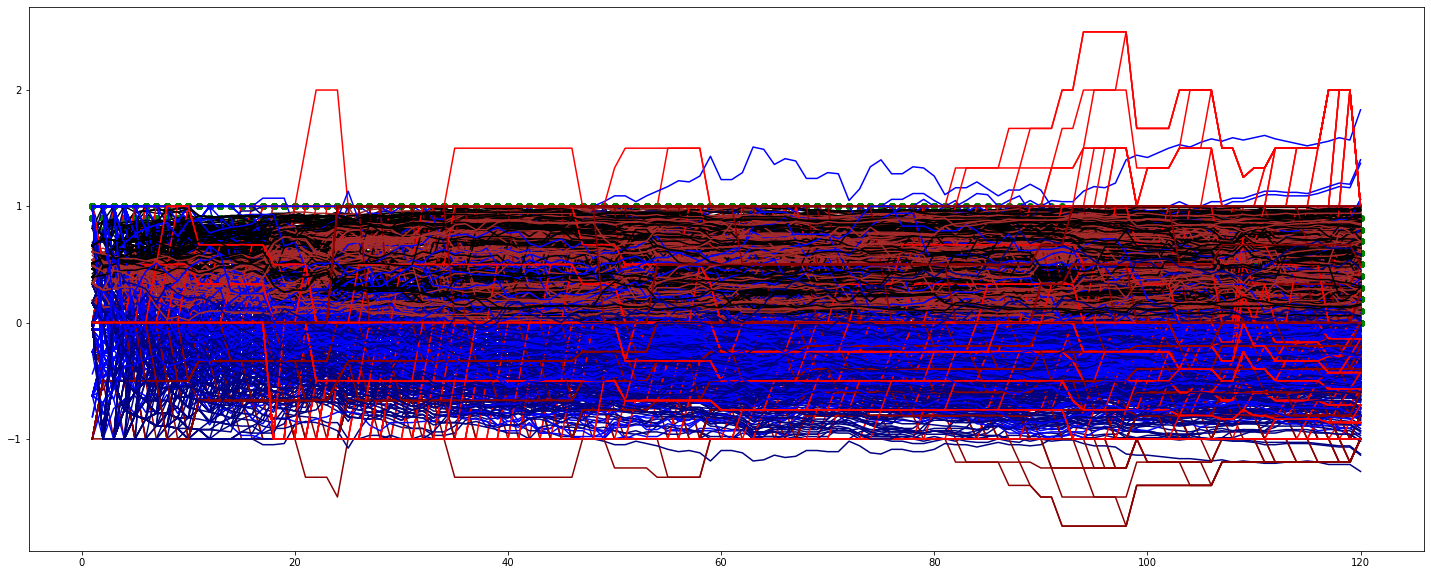

In [6]:
# matchNo=13
batbatProbList,aaProbList,bbProbList,matchNos=[],[],[],[]
bowlbowlProbList,ccProbList,ddProbList=[],[],[]
plt.figure(figsize=(25, 10)) 
for matchNo in range(len(matches1st5yrs)):
    batProbList,aProbList,bProbList,cProbList,dProbList,bowlProbList,P,remWicket=[],[],[],[],[],[],[],[]
    if len(matches1st5yrs[matchNo]['ourData'])<120:
        continue
#     if matchNo<210:
#         continue
    matchNos.append(matchNo)
    for p in range(119,-1,-1):
        ballData=matches1st5yrs[matchNo]['ourData'][p]

        batstate=''
        if ballData['totalrunscount']>=SafeScoreBatsmen[p]:
            batstate+='a1'
        else:
            batstate+='a2'
        if ballData['wicketsremaining']>=safeWicketBatsmen[p]:
            batstate+='b1'
        else:
            batstate+='b2'


        bowlstate=''
        if ballData['totalrunscount']<=safeScoreBowler[p]:
            bowlstate+='c1'
        else:
            bowlstate+='c2'
        if ballData['wicketsremaining']<=safeWicketBowler[p]:
            bowlstate+='d1'
        else:
            bowlstate+='d2'



    #     print(120-p,"actual",ballData['totalrunscount'],\
    #           "safeScoreBat",SafeScoreBatsmen[p],"safeScoreBowl",safeScoreBowler[p],\
    #           "safeWicketBat",safeWicketBatsmen[p],"safeWicketBowl",safeWicketBowler[p],\
    #           "maxScore",maxScore[p],"minScore",minScore[p],\
    #           "maxWicket",maxWicket[p],"minWicket",minWicket[p],)

    #     print(120-p,ballData,batstate,ab1stInnings[p][batstate],bowlstate,cd1stInnings[p][bowlstate])


        dist={}

        if 'a1' in batstate:
            dist['a1']=0 if maxScore[p]==SafeScoreBatsmen[p] else \
            round((ballData['totalrunscount']-SafeScoreBatsmen[p])/(maxScore[p]-SafeScoreBatsmen[p]),2)
            aProbList.append(dist['a1'])
        if 'a2' in batstate:
            dist['a2']=0 if SafeScoreBatsmen[p]==minScore[p] else \
            round((-1)*(SafeScoreBatsmen[p]-ballData['totalrunscount'])/(SafeScoreBatsmen[p]-minScore[p]),2)
            aProbList.append(dist['a2'])
        if 'b1' in batstate:
            dist['b1']=0 if maxWicket[p]==safeWicketBatsmen[p] else \
            round((ballData['wicketsremaining']-safeWicketBatsmen[p])/(maxWicket[p]-safeWicketBatsmen[p]),2)
            bProbList.append(dist['b1'])
        if 'b2' in batstate:
            dist['b2']=0 if safeWicketBatsmen[p]==minWicket[p] else \
            round((-1)*(safeWicketBatsmen[p]-ballData['wicketsremaining'])/(safeWicketBatsmen[p]-minWicket[p]),2)
            bProbList.append(dist['b2'])

        if 'c1' in bowlstate:
            dist['c1']=0 if safeScoreBowler[p]==minScore[p] else \
            round((safeScoreBowler[p]-ballData['totalrunscount'])/(safeScoreBowler[p]-minScore[p]),2)
            cProbList.append(dist['c1'])
        if 'c2' in bowlstate:
            dist['c2']=0 if maxScore[p]==safeScoreBowler[p] else \
            round((-1)*(ballData['totalrunscount']-safeScoreBowler[p])/(maxScore[p]-safeScoreBowler[p]),2)
            cProbList.append(dist['c2'])
        if 'd1' in bowlstate:
            dist['d1']=0 if safeWicketBowler[p]==minWicket[p] else \
            round((safeWicketBowler[p]-ballData['wicketsremaining'])/(safeWicketBowler[p]-minWicket[p]),2)
            dProbList.append(dist['d1'])
        if 'd2' in bowlstate:
            dist['d2']=0 if maxWicket[p]==safeWicketBowler[p] else \
            round((-1)*(ballData['wicketsremaining']-safeWicketBowler[p])/(maxWicket[p]-safeWicketBowler[p]),2)
            dProbList.append(dist['d2'])
    #     print(dist)

        a,b,c,d=batstate[:2],batstate[2:],bowlstate[:2],bowlstate[2:]
        batProb1=ab1stInnings[p][batstate]*numpy.sqrt((1+dist[a])*(1+dist[a])+(1+dist[b])*(1+dist[b]))
        bowlProb1=cd1stInnings[p][bowlstate]*numpy.sqrt((1+dist[c])*(1+dist[c])+(1+dist[d])*(1+dist[d]))

        batProb=round(batProb1/(batProb1+bowlProb1),2)
        bowlProb=round(1-batProb,2)

        P.append(120-p)
        remWicket.append(ballData['wicketsremaining']/10)
        batProbList.append(batProb)
        bowlProbList.append(bowlProb)
#         print(batProb,bowlProb,"::",batstate,bowlstate,ab1stInnings[p][batstate],cd1stInnings[p][bowlstate],\
#               "::",dist[a],dist[b],dist[c],dist[d],"::",2+dist[a]+dist[b],2+dist[c]+dist[d],\
#                "::")
    
    aaProbList.append(aProbList)
    bbProbList.append(bProbList)
    batbatProbList.append(batProbList)
    
    ccProbList.append(cProbList)
    ddProbList.append(dProbList)
    bowlbowlProbList.append(bowlProbList)
    
    plt.plot(P,batProbList,color='brown')
    plt.plot(P,aProbList,color='navy')
    plt.plot(P,bProbList,color='darkred')
    
    plt.plot(P,bowlProbList,color='black')
    plt.plot(P,cProbList,color='blue')
    plt.plot(P,dProbList,color='red')
    plt.scatter(P,remWicket,color='green')
plt.show()

In [7]:
testBlist,testAlist=[],[]
for j in range(len(batbatProbList)):
    for i in range(1,len(batbatProbList[j])):
        if (batbatProbList[j][i-1]-batbatProbList[j][i])>.01:
            testBlist.append(bbProbList[j][i-1]-bbProbList[j][i])
            testAlist.append(aaProbList[j][i-1]-aaProbList[j][i])
#     print(batProbList[i],aProbList[i],bProbList[i])
X=testBlist
print(min(X),max(X),numpy.mean(X),numpy.median(X),statistics.mode(X))
X=testAlist
print(min(X),max(X),numpy.mean(X),numpy.median(X),statistics.mode(X))

-0.5 1.0 0.04840146259141196 0.0 0
-1.17 1.0 0.05092068254265892 0.02999999999999997 0.0


In [8]:
testBlist,testAlist=[],[]
for j in range(len(batbatProbList)):
    for i in range(1,len(batbatProbList[j])):
        if (batbatProbList[j][i-1]-batbatProbList[j][i])>.01:
            testBlist.append(bbProbList[j][i-1]-bbProbList[j][i])
            testAlist.append(aaProbList[j][i-1]-aaProbList[j][i])
#     print(batProbList[i],aProbList[i],bProbList[i])
X=testBlist
print(min(X),max(X),numpy.mean(X),numpy.median(X),statistics.mode(X))
X=testAlist
print(min(X),max(X),numpy.mean(X),numpy.median(X),statistics.mode(X))

-0.5 1.0 0.04840146259141196 0.0 0
-1.17 1.0 0.05092068254265892 0.02999999999999997 0.0


In [9]:
truePredW,falsePred,truePredL=0,0,0
j=0
for matchNo in matchNos:
    if len(matches1st5yrs[matchNo]['ourData'])<120:
        continue
    pred='win' if batbatProbList[j][-1]>=.51 else 'loss'
    
    if matches1st5yrs[matchNo]['winLoss']==pred:
        if pred=='win':
            truePredW+=1
        if pred=='loss':
            truePredL+=1
    else:
        falsePred+=1
    j+=1
print(truePredW,truePredL,falsePred)

86 122 103


22.03.2021

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

In [11]:
X,Y=[],[]
for matchNo in range(len(matches1st5yrs)):
    x=[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    if totalRunThisMatch>=172.5:
        x.append(1)
        x.append(0)
    else:
        x.append(0)
        x.append(1)
#     wickRemThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['wicketsremaining']
#     x.append(wickRemThisMatch)
    X.append(x)
    if matches1st5yrs[matchNo]['winLoss']=='win': Y.append(1)
    else: Y.append(0)
# X=X.astype(‘category’)
# print(X)
# print(Y)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [13]:
confusion_matrix(y_test,y_pred)

array([[37,  7],
       [20, 16]], dtype=int64)

In [14]:
remWic=[]
for matchNo in range(len(matches1st5yrs)):
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    remWic.append(matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['wicketsremaining'])
numpy.mean(remWic)

3.8181818181818183

In [15]:
X,Y=[],[]
for matchNo in range(len(matches1st5yrs)):
    XX,YY=[],[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue
        YY.append(totalRunThisMatch-172.5)
        x=[]
        thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
        x.append(thisBallRun-SafeScoreBatsmen[b])
        thisBallWick=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
        x.append(thisBallWick-safeWicketBatsmen[b])
        XX.append(x)
    
    X.append(XX)
    Y.append(YY)
    
# for x in range(len(X)):
#     print(ballRem[x],matches1st5yrs[matchNo]['ourData'][ballRem[x]]['totalrunscount'],matches1st5yrs[matchNo]['ourData'][ballRem[x]]['wicketsremaining'],"--",X[x],Y[x])

finalX,finalY=[],[]
for j in range(120): 
    fX,fy=[],[]
    for i in range(len(X)):
        try:
            fX.append(X[i][j])
            fy.append(Y[i][j])
        except:
            None    
    finalX.append(fX)
    finalY.append(fy)

finalXScaled,finalYScaled=[],[]
for j in range(len(finalX)):
    XList=[]
    for i in range(len(finalX[j][0])):
        XList.append([])
        
    for p in range(len(finalX[j])):
        for q in range(len(finalX[j][0])):
            XList[q].append(finalX[j][p][q])
    
    minX,maxX=[],[]
    for i in range(len(XList)):
        minX.append(min(XList[i]))
        maxX.append(max(XList[i]))
        
    thisXX=[]
    for p in range(len(finalX[j])):
        thisX=[]
        for q in range(len(finalX[j][p])):
            thisX.append((finalX[j][p][q]-minX[q])/(maxX[q]-minX[q]))
        thisXX.append(thisX)
    finalXScaled.append(thisXX)
        
for j in range(len(finalY)):
    minY,maxY=min(finalY[j]),max(finalY[j])   
    thisY=[]
    for p in finalY[j]:
        thisY.append((p-minY)/(maxY-minY))
    finalYScaled.append(thisY)

weightRun,weightWickRem,ballNo=[],[],[]
for j in range(120): 
    ballNo.append(j+1)
    model=LinearRegression()
    model.fit(finalXScaled[j],finalYScaled[j])
    WR,WW=model.coef_
    weightRun.append(WR)
    weightWickRem.append(WW)

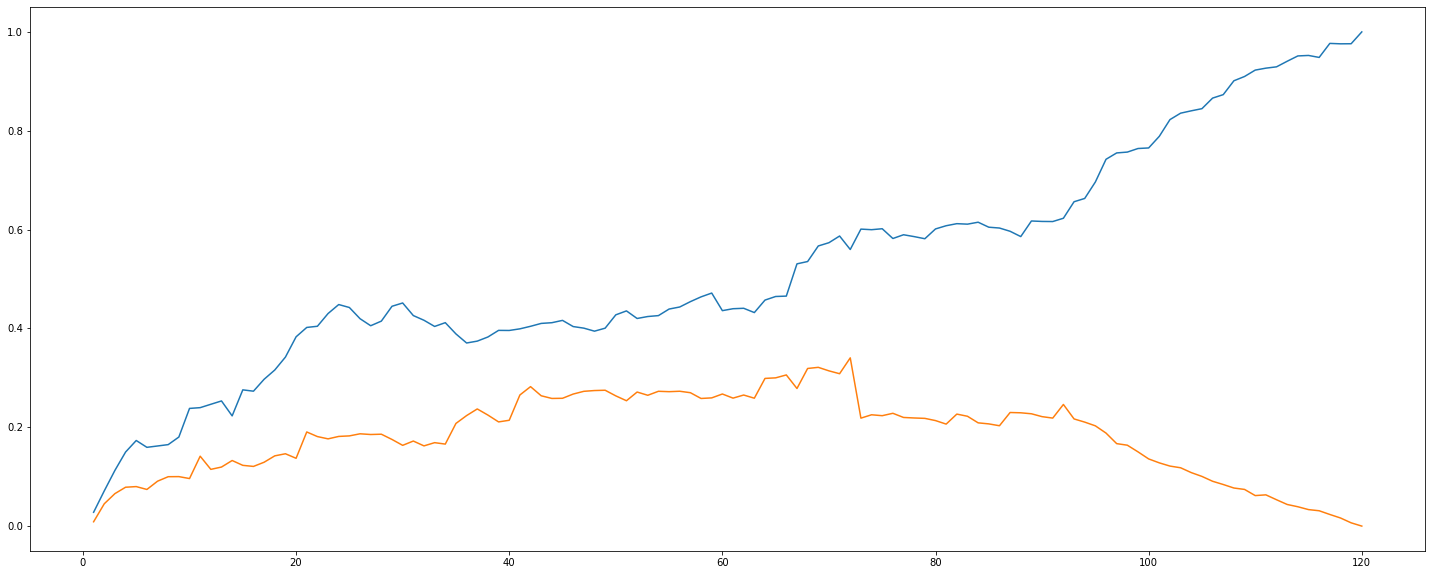

In [16]:
plt.figure(figsize=(25, 10))
plt.plot(ballNo,weightRun)
plt.plot(ballNo,weightWickRem)
plt.show()

In [17]:
weightages={}
for p in range(len(weightRun)):
    weightages[120-p-1]={}
    weightages[120-p-1]['runweightage']= round(weightRun[p],2)
    weightages[120-p-1]['wicketremweightage']=round(weightWickRem[p],2)
print(weightages)

{119: {'runweightage': 0.03, 'wicketremweightage': 0.01}, 118: {'runweightage': 0.07, 'wicketremweightage': 0.05}, 117: {'runweightage': 0.11, 'wicketremweightage': 0.07}, 116: {'runweightage': 0.15, 'wicketremweightage': 0.08}, 115: {'runweightage': 0.17, 'wicketremweightage': 0.08}, 114: {'runweightage': 0.16, 'wicketremweightage': 0.07}, 113: {'runweightage': 0.16, 'wicketremweightage': 0.09}, 112: {'runweightage': 0.16, 'wicketremweightage': 0.1}, 111: {'runweightage': 0.18, 'wicketremweightage': 0.1}, 110: {'runweightage': 0.24, 'wicketremweightage': 0.1}, 109: {'runweightage': 0.24, 'wicketremweightage': 0.14}, 108: {'runweightage': 0.25, 'wicketremweightage': 0.11}, 107: {'runweightage': 0.25, 'wicketremweightage': 0.12}, 106: {'runweightage': 0.22, 'wicketremweightage': 0.13}, 105: {'runweightage': 0.28, 'wicketremweightage': 0.12}, 104: {'runweightage': 0.27, 'wicketremweightage': 0.12}, 103: {'runweightage': 0.3, 'wicketremweightage': 0.13}, 102: {'runweightage': 0.32, 'wicke

In [18]:
weightages

{119: {'runweightage': 0.03, 'wicketremweightage': 0.01},
 118: {'runweightage': 0.07, 'wicketremweightage': 0.05},
 117: {'runweightage': 0.11, 'wicketremweightage': 0.07},
 116: {'runweightage': 0.15, 'wicketremweightage': 0.08},
 115: {'runweightage': 0.17, 'wicketremweightage': 0.08},
 114: {'runweightage': 0.16, 'wicketremweightage': 0.07},
 113: {'runweightage': 0.16, 'wicketremweightage': 0.09},
 112: {'runweightage': 0.16, 'wicketremweightage': 0.1},
 111: {'runweightage': 0.18, 'wicketremweightage': 0.1},
 110: {'runweightage': 0.24, 'wicketremweightage': 0.1},
 109: {'runweightage': 0.24, 'wicketremweightage': 0.14},
 108: {'runweightage': 0.25, 'wicketremweightage': 0.11},
 107: {'runweightage': 0.25, 'wicketremweightage': 0.12},
 106: {'runweightage': 0.22, 'wicketremweightage': 0.13},
 105: {'runweightage': 0.28, 'wicketremweightage': 0.12},
 104: {'runweightage': 0.27, 'wicketremweightage': 0.12},
 103: {'runweightage': 0.3, 'wicketremweightage': 0.13},
 102: {'runweighta

23.03.2021

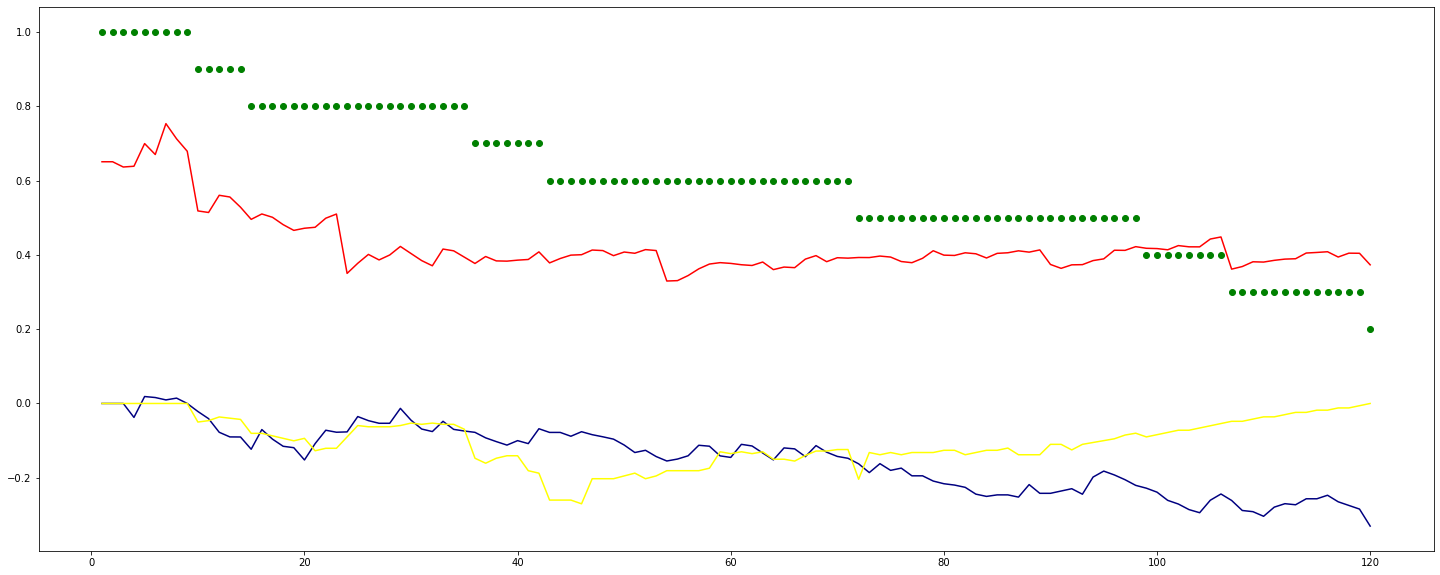

In [19]:
# matchNo=13
batbatProbList,aaProbList,bbProbList,matchNos=[],[],[],[]
bowlbowlProbList,ccProbList,ddProbList=[],[],[]
plt.figure(figsize=(25, 10)) 
for matchNo in range(len(matches1st5yrs)):
    batProbList,aProbList,bProbList,cProbList,dProbList,bowlProbList,P,remWicket=[],[],[],[],[],[],[],[]
    if len(matches1st5yrs[matchNo]['ourData'])<120:
        continue
#     if matchNo<210:
#         continue
    matchNos.append(matchNo)
    for p in range(119,-1,-1):
        ballData=matches1st5yrs[matchNo]['ourData'][p]

        batstate=''
        if ballData['totalrunscount']>=SafeScoreBatsmen[p]:
            batstate+='a1'
        else:
            batstate+='a2'
        if ballData['wicketsremaining']>=safeWicketBatsmen[p]:
            batstate+='b1'
        else:
            batstate+='b2'


        bowlstate=''
        if ballData['totalrunscount']<=safeScoreBowler[p]:
            bowlstate+='c1'
        else:
            bowlstate+='c2'
        if ballData['wicketsremaining']<=safeWicketBowler[p]:
            bowlstate+='d1'
        else:
            bowlstate+='d2'



    #     print(120-p,"actual",ballData['totalrunscount'],\
    #           "safeScoreBat",SafeScoreBatsmen[p],"safeScoreBowl",safeScoreBowler[p],\
    #           "safeWicketBat",safeWicketBatsmen[p],"safeWicketBowl",safeWicketBowler[p],\
    #           "maxScore",maxScore[p],"minScore",minScore[p],\
    #           "maxWicket",maxWicket[p],"minWicket",minWicket[p],)

    #     print(120-p,ballData,batstate,ab1stInnings[p][batstate],bowlstate,cd1stInnings[p][bowlstate])


        dist={}

        if 'a1' in batstate:
            dist['a1']=0 if maxScore[p]==SafeScoreBatsmen[p] else \
            round((ballData['totalrunscount']-SafeScoreBatsmen[p])/(maxScore[p]-SafeScoreBatsmen[p]),2)
            aProbList.append(dist['a1']*weightages[p]['runweightage'])
        if 'a2' in batstate:
            dist['a2']=0 if SafeScoreBatsmen[p]==minScore[p] else \
            round((-1)*(SafeScoreBatsmen[p]-ballData['totalrunscount'])/(SafeScoreBatsmen[p]-minScore[p]),2)
            aProbList.append(dist['a2']*weightages[p]['runweightage'])
        if 'b1' in batstate:
            dist['b1']=0 if maxWicket[p]==safeWicketBatsmen[p] else \
            round((ballData['wicketsremaining']-safeWicketBatsmen[p])/(maxWicket[p]-safeWicketBatsmen[p]),2)
            bProbList.append(dist['b1']*weightages[p]['wicketremweightage'])
        if 'b2' in batstate:
            dist['b2']=0 if safeWicketBatsmen[p]==minWicket[p] else \
            round((-1)*(safeWicketBatsmen[p]-ballData['wicketsremaining'])/(safeWicketBatsmen[p]-minWicket[p]),2)
            bProbList.append(dist['b2']*weightages[p]['wicketremweightage'])

        if 'c1' in bowlstate:
            dist['c1']=0 if safeScoreBowler[p]==minScore[p] else \
            round((safeScoreBowler[p]-ballData['totalrunscount'])/(safeScoreBowler[p]-minScore[p]),2)
            cProbList.append(dist['c1'])
        if 'c2' in bowlstate:
            dist['c2']=0 if maxScore[p]==safeScoreBowler[p] else \
            round((-1)*(ballData['totalrunscount']-safeScoreBowler[p])/(maxScore[p]-safeScoreBowler[p]),2)
            cProbList.append(dist['c2'])
        if 'd1' in bowlstate:
            dist['d1']=0 if safeWicketBowler[p]==minWicket[p] else \
            round((safeWicketBowler[p]-ballData['wicketsremaining'])/(safeWicketBowler[p]-minWicket[p]),2)
            dProbList.append(dist['d1'])
        if 'd2' in bowlstate:
            dist['d2']=0 if maxWicket[p]==safeWicketBowler[p] else \
            round((-1)*(ballData['wicketsremaining']-safeWicketBowler[p])/(maxWicket[p]-safeWicketBowler[p]),2)
            dProbList.append(dist['d2'])
    #     print(dist)

        a,b,c,d=batstate[:2],batstate[2:],bowlstate[:2],bowlstate[2:]
        batProb1=ab1stInnings[p][batstate]*numpy.sqrt(\
                                                      (1+weightages[p]['runweightage']*dist[a])*(1+weightages[p]['runweightage']*dist[a])+\
                                                      (1+weightages[p]['wicketremweightage']*dist[b])*(1+weightages[p]['wicketremweightage']*dist[b]))
        bowlProb1=cd1stInnings[p][bowlstate]*numpy.sqrt((1+dist[c])*(1+dist[c])+(1+dist[d])*(1+dist[d]))

        batProb=round(batProb1/(batProb1+bowlProb1),2)
        bowlProb=round(1-batProb,2)

        P.append(120-p)
        remWicket.append(ballData['wicketsremaining']/10)
        batProbList.append(batProb1)
        bowlProbList.append(bowlProb)
#         print(batProb,bowlProb,"::",batstate,bowlstate,ab1stInnings[p][batstate],cd1stInnings[p][bowlstate],\
#               "::",dist[a],dist[b],dist[c],dist[d],"::",2+dist[a]+dist[b],2+dist[c]+dist[d],\
#                "::")
    
    aaProbList.append(aProbList)
    bbProbList.append(bProbList)
    batbatProbList.append(batProbList)
    
    ccProbList.append(cProbList)
    ddProbList.append(dProbList)
    bowlbowlProbList.append(bowlProbList)
    
    if matchNo==13:
        plt.plot(P,batProbList,color='red')
        plt.plot(P,aProbList,color='navy')
        plt.plot(P,bProbList,color='yellow')

#         plt.plot(P,bowlProbList,color='black')
#         plt.plot(P,cProbList,color='blue')
#         plt.plot(P,dProbList,color='red')
        plt.scatter(P,remWicket,color='green')
plt.show()

In [20]:
for i in range(len(batbatProbList[13])):
    print(i+1,batbatProbList[13][i])

1 0.6505382386916237
2 0.6505382386916237
3 0.6363961030678928
4 0.6384571735833188
5 0.6994738741146805
6 0.6700189179418742
7 0.7531395406855227
8 0.7122161469666354
9 0.6788225099390857
10 0.5182183818275844
11 0.5140262514230183
12 0.5603064367076287
13 0.5556820884498618
14 0.5282085118587166
15 0.4955367686055194
16 0.5100198364965817
17 0.5010555124544585
18 0.48127708538013736
19 0.46585648554570963
20 0.4716139017628721
21 0.4742042655607392
22 0.4986098309861129
23 0.5098290097670003
24 0.35005916503499807
25 0.3772803787105818
26 0.40117815955009317
27 0.38633966964058974
28 0.3996617272144032
29 0.4226134165641219
30 0.40352094815511125
31 0.38451863760421284
32 0.3705853894583542
33 0.41559095428197185
34 0.41084127023705885
35 0.3938456512391625
36 0.37680334990549114
37 0.3955351311021563
38 0.38373110803269517
39 0.38306524390630897
40 0.38574720049405414
41 0.38752895910370366
42 0.408003031929911
43 0.37834075274017204
44 0.3901639012633024
45 0.3992618190410899
46 0.

In [21]:
matches1st5yrs[13]

{'ourData': {119: {'totalrunscount': 0, 'wicketsremaining': 10},
  118: {'totalrunscount': 1, 'wicketsremaining': 10},
  117: {'totalrunscount': 2, 'wicketsremaining': 10},
  116: {'totalrunscount': 3, 'wicketsremaining': 10},
  115: {'totalrunscount': 7, 'wicketsremaining': 10},
  114: {'totalrunscount': 8, 'wicketsremaining': 10},
  113: {'totalrunscount': 10, 'wicketsremaining': 10},
  112: {'totalrunscount': 11, 'wicketsremaining': 10},
  111: {'totalrunscount': 11, 'wicketsremaining': 10},
  110: {'totalrunscount': 11, 'wicketsremaining': 9},
  109: {'totalrunscount': 11, 'wicketsremaining': 9},
  108: {'totalrunscount': 11, 'wicketsremaining': 9},
  107: {'totalrunscount': 11, 'wicketsremaining': 9},
  106: {'totalrunscount': 12, 'wicketsremaining': 9},
  105: {'totalrunscount': 12, 'wicketsremaining': 8},
  104: {'totalrunscount': 16, 'wicketsremaining': 8},
  103: {'totalrunscount': 16, 'wicketsremaining': 8},
  102: {'totalrunscount': 17, 'wicketsremaining': 8},
  101: {'total

In [22]:
Xbowl,Ybowl=[],[]
for matchNo in range(len(matches1st5yrs)):
    XbowlXbowl,YbowlYbowl=[],[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue
        YbowlYbowl.append(139-totalRunThisMatch)
        x=[]
        thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
        x.append(safeScoreBowler[b]-thisBallRun)
        thisBallWick=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
        x.append(safeWicketBowler[b]-thisBallWick)
        XbowlXbowl.append(x)
    
    Xbowl.append(XbowlXbowl)
    Ybowl.append(YbowlYbowl)
    
finalXbowl,finalYbowl=[],[]
for j in range(120): 
    fXbowl,fy=[],[]
    for i in range(len(Xbowl)):
        try:
            fXbowl.append(Xbowl[i][j])
            fy.append(Ybowl[i][j])
        except:
            None    
    finalXbowl.append(fXbowl)
    finalYbowl.append(fy)
    
finalXbowlScaled,finalYbowlScaled=[],[]
for j in range(len(finalXbowl)):
    XbowlList=[]
    for i in range(len(finalXbowl[j][0])):
        XbowlList.append([])
        
    for p in range(len(finalXbowl[j])):
        for q in range(len(finalXbowl[j][0])):
            XbowlList[q].append(finalXbowl[j][p][q])
    
    minXbowl,maxXbowl=[],[]
    for i in range(len(XbowlList)):
        minXbowl.append(min(XbowlList[i]))
        maxXbowl.append(max(XbowlList[i]))
        
    thisXbowlXbowl=[]
    for p in range(len(finalXbowl[j])):
        thisXbowl=[]
        for q in range(len(finalXbowl[j][p])):
            thisXbowl.append((finalXbowl[j][p][q]-minXbowl[q])/(maxXbowl[q]-minXbowl[q]))
        thisXbowlXbowl.append(thisXbowl)
    finalXbowlScaled.append(thisXbowlXbowl)
        
for j in range(len(finalYbowl)):
    minYbowl,maxYbowl=min(finalYbowl[j]),max(finalYbowl[j])   
    thisYbowl=[]
    for p in finalYbowl[j]:
        thisYbowl.append((p-minYbowl)/(maxYbowl-minYbowl))
    finalYbowlScaled.append(thisYbowl)

weightRunBowl,weightWickRemBowl,ballNo=[],[],[]
for j in range(120): 
    ballNo.append(j+1)
    model=LinearRegression()
    model.fit(finalXbowlScaled[j],finalYbowlScaled[j])
    WR,WW=model.coef_
    weightRunBowl.append(WR)
    weightWickRemBowl.append(WW)

In [23]:
weightagesBowl={}
for p in range(len(weightRun)):
    weightagesBowl[120-p-1]={}
    weightagesBowl[120-p-1]['runweightage']= round(weightRunBowl[p],2)
    weightagesBowl[120-p-1]['wicketremweightage']=round(weightWickRemBowl[p],2)
# print(weightagesBowl)

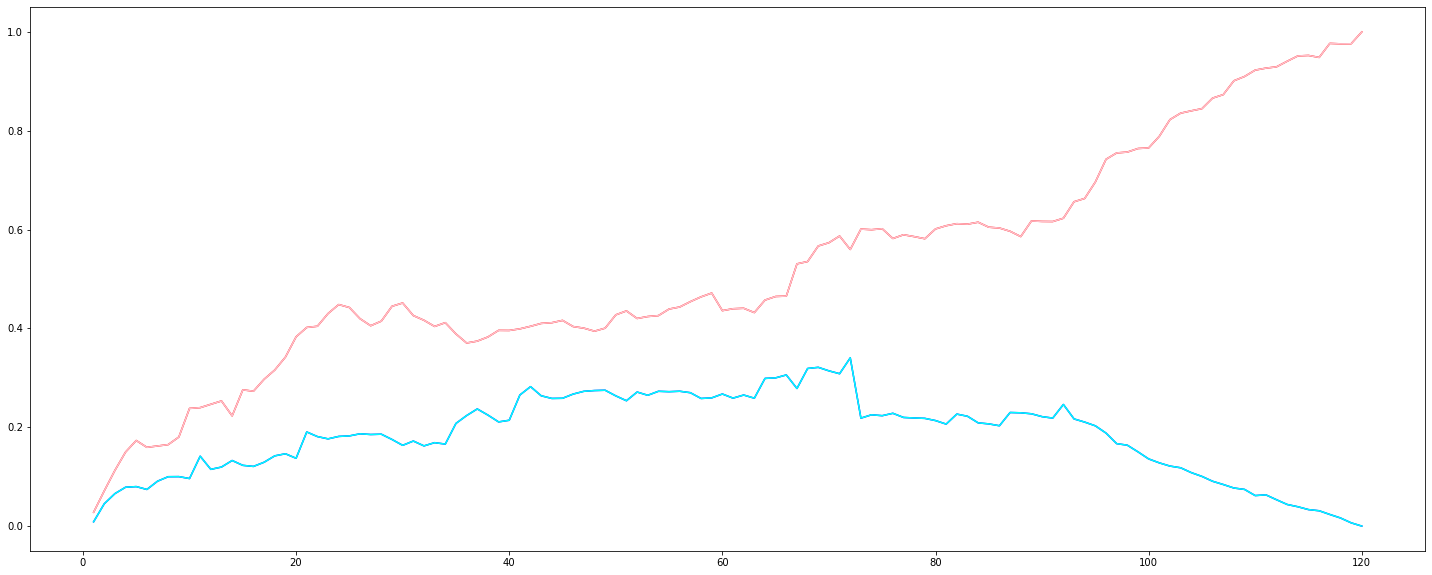

In [24]:
plt.figure(figsize=(25, 10))
plt.plot(ballNo,weightRun,color='red')
plt.plot(ballNo,weightWickRem,color='blue')
plt.plot(ballNo,weightRunBowl,color='pink')
plt.plot(ballNo,weightWickRemBowl,color='cyan')
plt.show()

In [25]:
for i in range(len(finalXbowlScaled[100])):
    print(finalXScaled[100][i],finalYScaled[100][i],"--",finalXbowlScaled[100][i],finalYbowlScaled[100][i])

[0.762962962962963, 0.8888888888888888] 0.8659217877094972 -- [0.23703703703703705, 0.1111111111111111] 0.1340782122905028
[0.8518518518518519, 0.5555555555555556] 0.9664804469273743 -- [0.14814814814814814, 0.4444444444444444] 0.0335195530726257
[0.3111111111111111, 0.3333333333333333] 0.3463687150837989 -- [0.6888888888888889, 0.6666666666666666] 0.6536312849162011
[0.42962962962962964, 0.5555555555555556] 0.547486033519553 -- [0.5703703703703704, 0.4444444444444444] 0.45251396648044695
[0.25925925925925924, 0.4444444444444444] 0.24022346368715083 -- [0.7407407407407407, 0.5555555555555556] 0.7597765363128491
[0.5111111111111111, 0.5555555555555556] 0.553072625698324 -- [0.4888888888888889, 0.4444444444444444] 0.44692737430167595
[0.17037037037037037, 0.4444444444444444] 0.41899441340782123 -- [0.8296296296296296, 0.5555555555555556] 0.5810055865921788
[0.7407407407407407, 0.7777777777777778] 0.7877094972067039 -- [0.25925925925925924, 0.2222222222222222] 0.2122905027932961
[0.770370

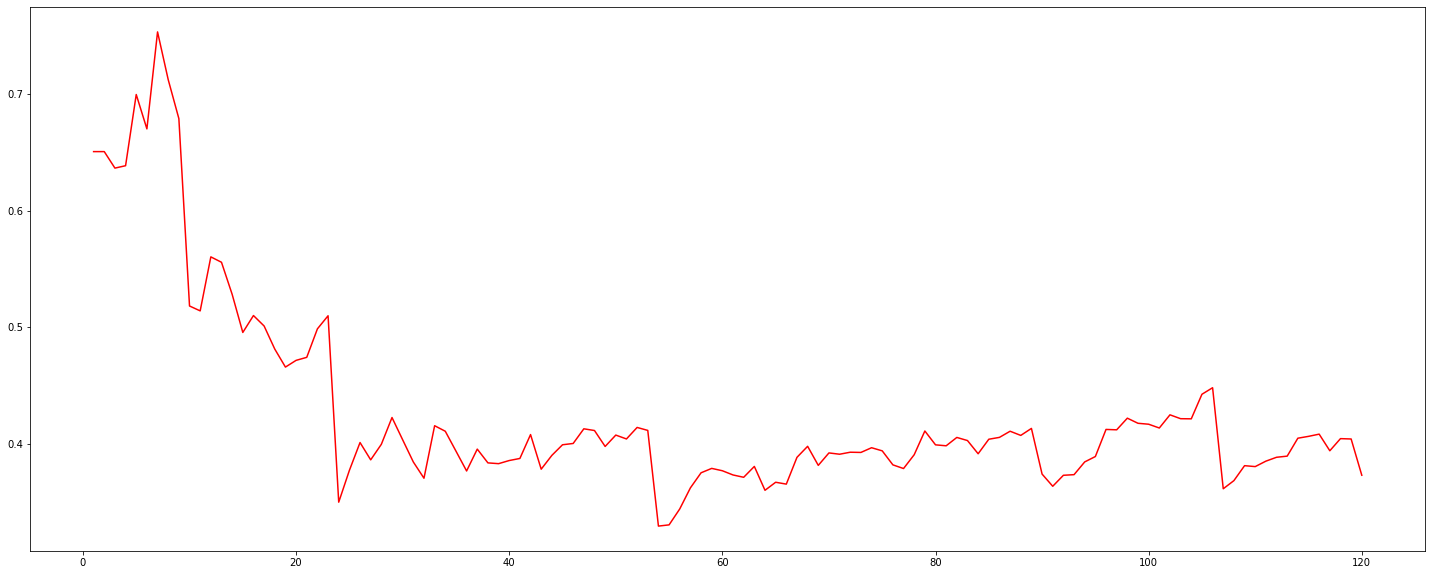

In [26]:
# matchNo=13
batbatProbList,aaProbList,bbProbList,matchNos=[],[],[],[]
bowlbowlProbList,ccProbList,ddProbList=[],[],[]
plt.figure(figsize=(25, 10)) 
for matchNo in range(len(matches1st5yrs)):
    batProbList,aProbList,bProbList,cProbList,dProbList,bowlProbList,P,remWicket=[],[],[],[],[],[],[],[]
    if len(matches1st5yrs[matchNo]['ourData'])<120:
        continue
#     if matchNo<210:
#         continue
    matchNos.append(matchNo)
    for p in range(119,-1,-1):
        ballData=matches1st5yrs[matchNo]['ourData'][p]

        batstate=''
        if ballData['totalrunscount']>=SafeScoreBatsmen[p]:
            batstate+='a1'
        else:
            batstate+='a2'
        if ballData['wicketsremaining']>=safeWicketBatsmen[p]:
            batstate+='b1'
        else:
            batstate+='b2'


        bowlstate=''
        if ballData['totalrunscount']<=safeScoreBowler[p]:
            bowlstate+='c1'
        else:
            bowlstate+='c2'
        if ballData['wicketsremaining']<=safeWicketBowler[p]:
            bowlstate+='d1'
        else:
            bowlstate+='d2'



    #     print(120-p,"actual",ballData['totalrunscount'],\
    #           "safeScoreBat",SafeScoreBatsmen[p],"safeScoreBowl",safeScoreBowler[p],\
    #           "safeWicketBat",safeWicketBatsmen[p],"safeWicketBowl",safeWicketBowler[p],\
    #           "maxScore",maxScore[p],"minScore",minScore[p],\
    #           "maxWicket",maxWicket[p],"minWicket",minWicket[p],)

    #     print(120-p,ballData,batstate,ab1stInnings[p][batstate],bowlstate,cd1stInnings[p][bowlstate])


        dist={}

        if 'a1' in batstate:
            dist['a1']=0 if maxScore[p]==SafeScoreBatsmen[p] else \
            round((ballData['totalrunscount']-SafeScoreBatsmen[p])/(maxScore[p]-SafeScoreBatsmen[p]),2)
            aProbList.append(dist['a1']*weightages[p]['runweightage'])
        if 'a2' in batstate:
            dist['a2']=0 if SafeScoreBatsmen[p]==minScore[p] else \
            round((-1)*(SafeScoreBatsmen[p]-ballData['totalrunscount'])/(SafeScoreBatsmen[p]-minScore[p]),2)
            aProbList.append(dist['a2']*weightages[p]['runweightage'])
        if 'b1' in batstate:
            dist['b1']=0 if maxWicket[p]==safeWicketBatsmen[p] else \
            round((ballData['wicketsremaining']-safeWicketBatsmen[p])/(maxWicket[p]-safeWicketBatsmen[p]),2)
            bProbList.append(dist['b1']*weightages[p]['wicketremweightage'])
        if 'b2' in batstate:
            dist['b2']=0 if safeWicketBatsmen[p]==minWicket[p] else \
            round((-1)*(safeWicketBatsmen[p]-ballData['wicketsremaining'])/(safeWicketBatsmen[p]-minWicket[p]),2)
            bProbList.append(dist['b2']*weightages[p]['wicketremweightage'])

        if 'c1' in bowlstate:
            dist['c1']=0 if safeScoreBowler[p]==minScore[p] else \
            round((safeScoreBowler[p]-ballData['totalrunscount'])/(safeScoreBowler[p]-minScore[p]),2)
            cProbList.append(dist['c1']*weightagesBowl[p]['runweightage'])
        if 'c2' in bowlstate:
            dist['c2']=0 if maxScore[p]==safeScoreBowler[p] else \
            round((-1)*(ballData['totalrunscount']-safeScoreBowler[p])/(maxScore[p]-safeScoreBowler[p]),2)
            cProbList.append(dist['c2']*weightagesBowl[p]['runweightage'])
        if 'd1' in bowlstate:
            dist['d1']=0 if safeWicketBowler[p]==minWicket[p] else \
            round((safeWicketBowler[p]-ballData['wicketsremaining'])/(safeWicketBowler[p]-minWicket[p]),2)
            dProbList.append(dist['d1']*weightagesBowl[p]['wicketremweightage'])
        if 'd2' in bowlstate:
            dist['d2']=0 if maxWicket[p]==safeWicketBowler[p] else \
            round((-1)*(ballData['wicketsremaining']-safeWicketBowler[p])/(maxWicket[p]-safeWicketBowler[p]),2)
            dProbList.append(dist['d2']*weightagesBowl[p]['wicketremweightage'])
    #     print(dist)

        a,b,c,d=batstate[:2],batstate[2:],bowlstate[:2],bowlstate[2:]
        batProb1=ab1stInnings[p][batstate]*numpy.sqrt(\
                                                      (1+weightages[p]['runweightage']*dist[a])*(1+weightages[p]['runweightage']*dist[a])+\
                                                      (1+weightages[p]['wicketremweightage']*dist[b])*(1+weightages[p]['wicketremweightage']*dist[b]))
        bowlProb1=cd1stInnings[p][bowlstate]*numpy.sqrt(\
                                                        (1+weightagesBowl[p]['runweightage']*dist[c])*(1+weightagesBowl[p]['runweightage']*dist[c])+\
                                                        (1+weightagesBowl[p]['wicketremweightage']*dist[d])*(1+weightagesBowl[p]['wicketremweightage']*dist[d]))

        batProb=round(batProb1/(batProb1+bowlProb1),2)
        bowlProb=round(1-batProb,2)

        P.append(120-p)
        remWicket.append(ballData['wicketsremaining']/10)
        batProbList.append(batProb1)
#         bowlProbList.append(bowlProb1)
#         print(batProb,bowlProb,"::",batstate,bowlstate,ab1stInnings[p][batstate],cd1stInnings[p][bowlstate],\
#               "::",dist[a],dist[b],dist[c],dist[d],"::",2+dist[a]+dist[b],2+dist[c]+dist[d],\
#                "::")
    
    aaProbList.append(aProbList)
    bbProbList.append(bProbList)
    batbatProbList.append(batProbList)
    
    ccProbList.append(cProbList)
    ddProbList.append(dProbList)
    bowlbowlProbList.append(bowlProbList)
    
    if matchNo==13:
        plt.plot(P,batProbList,color='red')
#         plt.plot(P,aProbList,color='navy')
#         plt.plot(P,bProbList,color='yellow')

#         plt.plot(P,bowlProbList,color='black')
#         plt.plot(P,cProbList,color='blue')
#         plt.plot(P,dProbList,color='pink')
#         plt.scatter(P,remWicket,color='green')
plt.show()

In [28]:
fileCursor=open('319MatchesData.csv','w')
csvwriter = csv.writer(fileCursor)

for matchNo in range(len(matches1st5yrs)):
    for p in range(len(matches1st5yrs[matchNo]['ourData'])-1,-1,-1): 
        row=[]
        try:
            row.append(matches1st5yrs[matchNo]['matchDate'].year)
            row.append("match_"+str(matchNo+1))
            row.append(p)
            row.append(matches1st5yrs[matchNo]['ourData'][p]['totalrunscount'])
            row.append(matches1st5yrs[matchNo]['ourData'][p]['wicketsremaining'])
            row.append(weightages[p]['runweightage'])
            row.append(weightages[p]['wicketremweightage'])
            csvwriter.writerow(row)
        except:
            None
fileCursor.close()

In [29]:
weightages[60]['runweightage'],totalScoreMorethanMedian

NameError: name 'totalScoreMorethanMedian' is not defined

In [30]:
matches1st5yrs[13]['ourData'][60]['totalrunscount']

69

In [31]:
141*145/319 + 11*.24

66.7309090909091

In [32]:
truePredW,falsePred,truePredL=0,0,0
j=0
for matchNo in matchNos:
    if len(matches1st5yrs[matchNo]['ourData'])<120:
        continue
    pred='win' if batbatProbList[j][-1]>=.51 else 'loss'
    
    if matches1st5yrs[matchNo]['winLoss']==pred:
        if pred=='win':
            truePredW+=1
        if pred=='loss':
            truePredL+=1
    else:
        falsePred+=1
    j+=1
print(truePredW,truePredL,falsePred)

87 120 104


In [33]:
for i in range(len(batProbList)):
    print(batProbList[i]/bowlProbList[i])

IndexError: list index out of range

In [34]:
X,Y=[],[]
for matchNo in range(len(matches1st5yrs)):
    XX,YY=[],[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue
        YY.append(totalRunThisMatch)
        x=[]
        thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
        x.append(thisBallRun)
        XX.append(x)
    
    X.append(XX)
    Y.append(YY)

finalX,finalY=[],[]
for j in range(120): 
    fX,fy=[],[]
    for i in range(len(X)):
        try:
            fX.append(X[i][j])
            fy.append(Y[i][j])
        except:
            None    
    finalX.append(fX)
    finalY.append(fy)

weightRun,constRun,ballNo=[],[],[]
for j in range(120): 
    ballNo.append(j+1)
    model=LinearRegression()
    model.fit(finalX[j],finalY[j])
    WR,CR=model.coef_,model.intercept_
    weightRun.append(WR)
    constRun.append(CR)

In [35]:
weightRun,constRun

([array([0.86072413]),
  array([1.23144059]),
  array([1.53111114]),
  array([1.40474338]),
  array([1.5172096]),
  array([1.25293813]),
  array([1.34493027]),
  array([1.27827939]),
  array([1.37430699]),
  array([1.55560039]),
  array([1.56806943]),
  array([1.5680508]),
  array([1.5027915]),
  array([1.40083866]),
  array([1.49206383]),
  array([1.4614144]),
  array([1.48868459]),
  array([1.43769382]),
  array([1.55633182]),
  array([1.57697002]),
  array([1.5537516]),
  array([1.5512249]),
  array([1.6016348]),
  array([1.62381963]),
  array([1.65618531]),
  array([1.63813183]),
  array([1.62126278]),
  array([1.63348012]),
  array([1.63770034]),
  array([1.64545367]),
  array([1.60219052]),
  array([1.55518855]),
  array([1.59078662]),
  array([1.53176544]),
  array([1.47365425]),
  array([1.44621961]),
  array([1.450038]),
  array([1.4727483]),
  array([1.47886372]),
  array([1.48000519]),
  array([1.46701813]),
  array([1.4450339]),
  array([1.44740447]),
  array([1.45766798]),

In [36]:
X,Y=[],[]
for matchNo in range(len(matches1st5yrs)):
    XX,YY=[],[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue
        YY.append(totalRunThisMatch)
        x=[0]*10
        thiswicketsremaining=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
        x[thiswicketsremaining-1]=1
        XX.append(x)
    
    X.append(XX)
    Y.append(YY)

finalX,finalY=[],[]
for j in range(120): 
    fX,fy=[],[]
    for i in range(len(X)):
        try:
            fX.append(X[i][j])
            fy.append(Y[i][j])
        except:
            None    
    finalX.append(fX)
    finalY.append(fy)

weightWick,constWick,ballNo=[],[],[]
for j in range(120): 
    ballNo.append(j+1)
    model=LinearRegression(fit_intercept = False)
    model.fit(numpy.array(finalX[j]),finalY[j])
    WW,CW=model.coef_,model.intercept_
    weightWick.append(WW)
    constWick.append(CW)

In [37]:
for i in range(len(finalX[j])):
    print(finalX[j][i],finalY[j][i])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0] 222
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 240
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 129
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 165
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 110
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 166
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 142
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 208
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 214
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 182
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 135
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0] 147
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 154
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 158
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 178
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 137
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 191
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 164
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 196
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 169
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 178
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 156
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 162
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 109
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 126
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 144
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] 103
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0] 187
[0, 1, 0, 0, 0, 0, 0

In [38]:
weightRun,constRun,weightWick,constWick

([array([0.86072413]),
  array([1.23144059]),
  array([1.53111114]),
  array([1.40474338]),
  array([1.5172096]),
  array([1.25293813]),
  array([1.34493027]),
  array([1.27827939]),
  array([1.37430699]),
  array([1.55560039]),
  array([1.56806943]),
  array([1.5680508]),
  array([1.5027915]),
  array([1.40083866]),
  array([1.49206383]),
  array([1.4614144]),
  array([1.48868459]),
  array([1.43769382]),
  array([1.55633182]),
  array([1.57697002]),
  array([1.5537516]),
  array([1.5512249]),
  array([1.6016348]),
  array([1.62381963]),
  array([1.65618531]),
  array([1.63813183]),
  array([1.62126278]),
  array([1.63348012]),
  array([1.63770034]),
  array([1.64545367]),
  array([1.60219052]),
  array([1.55518855]),
  array([1.59078662]),
  array([1.53176544]),
  array([1.47365425]),
  array([1.44621961]),
  array([1.450038]),
  array([1.4727483]),
  array([1.47886372]),
  array([1.48000519]),
  array([1.46701813]),
  array([1.4450339]),
  array([1.44740447]),
  array([1.45766798]),

In [39]:
b=96
r=123
w=4
print(weightRun[120-b+1]*r+constRun[120-b+1]+weightWick[120-b+1][10-w-1])

[425.31496094]


In [47]:
X,Y=[],[]
for matchNo in range(len(matches1st5yrs)):
    XX,YY=[],[]
    ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballRem.sort(reverse=True)
    totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']
    
    for b in ballRem:
        if b<0:
            continue
        YY.append(totalRunThisMatch)
        x=[0]*10
        thiswicketsremaining=matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']
        x[thiswicketsremaining-1]=1
        thisBallRun=matches1st5yrs[matchNo]['ourData'][b]['totalrunscount']
        x.append(thisBallRun)
        XX.append(x)
    
    X.append(XX)
    Y.append(YY)

finalX,finalY=[],[]
for j in range(120): 
    fX,fy=[],[]
    for i in range(len(X)):
        try:
            fX.append(X[i][j])
            fy.append(Y[i][j])
        except:
            None    
    finalX.append(fX)
    finalY.append(fy)

weight,const,ballNo=[],[],[]
for j in range(120): 
     ballNo.append(j+1)
     model=LinearRegression()
     model.fit(numpy.array(finalX[j]),finalY[j])
     WW,CW=model.coef_,model.intercept_
     weight.append(WW)
     const.append(CW)
weight.reverse()
const.append(CW)

In [48]:
b=20
r=32
Remw=10
print(weight[b-1][-1]*r+const[b-1]+weight[b-1][Remw-1])

132.3947294053465


In [49]:
weight[20]

array([-18.92752807,  -2.69995548,  -1.84551767,   6.16730172,
         4.63719192,   8.55521791,   6.88939436,  12.02624024,
         9.04336752, -23.84571246,   1.07172258])

In [50]:
const[20]

116.40171628624516

In [51]:
model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [52]:
import statsmodels.api as sm

In [53]:
j=60

finalX[j]=sm.add_constant(finalX[j])
model = sm.OLS(finalY[j],finalX[j])

In [54]:
results = model.fit()

In [55]:
results.params

array([ 6.95733008e+01, -5.47587668e-13, -6.58253089e-15, -6.21667576e-15,
       -2.29545264e+01, -1.39753548e+01,  8.33855047e+00,  1.63155305e+01,
        2.16421659e+01,  2.76469301e+01,  3.25600050e+01,  9.60093986e-01])

In [56]:
results.pvalues[5]

0.013727373433728228

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     51.60
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           1.77e-48
Time:                        17:10:44   Log-Likelihood:                -1414.9
No. Observations:                 319   AIC:                             2846.
Df Residuals:                     311   BIC:                             2876.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.5733      5.636     12.345      0.000      58.484      80.663
x1         -5.476e-13   5.39e-14    -10.165      0.000   -6.54e-13   -4.42e-13
x2         -6.583e-15   2.26e-15     -2.908      0.004    -1.1e-14   -2.13e-15
x3         -6.217e-15   2.29e-15     -2.709      0.007   -1.07e-14    -1.7e-15
x4           -22.9545      8.188     -2.803      0.005     -39.065      -6.844
x5           -13.9754      5.639     -2.478      0.014     -25.070      -2.880
x6             8.3386      2.987      2.792      0.006       2.462      14.215
x7            16.3155      2.690      6.066      0.000      11.024      21.608
x8            21.6422      2.714      7.974      0.000      16.302      26.983
x9            27.6469      3.372      8.199      0.000      21.012      34.282
x10           32.5600      4.676      6.963      0.000      23.359      41.761
x11            0.9601      0.088     10.921      0.000       0.787       1.133
==============================================================================
Omnibus:                       14.656   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.003
Skew:                          -0.293   Prob(JB):                     6.14e-06
Kurtosis:                       4.209   Cond. No.                     1.86e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.07e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
print(results.predict([1,0,0,0,0,0,0,0,0,0,1,100]))

[198.14270443]
